In [6]:
import keras
import nltk
import pickle
import json
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
import pandas as pd
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
import random

In [7]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [8]:
words = []
classes = []
documents = []
ignore = ['?', '!', ',', "'s"]

In [5]:
data_file = open('intonts.json').read()
intents = json.loads(data_file)

In [12]:
df = pd.DataFrame(columns=['Intent', 'Pattern'])
for intent in intents['intents']:
    for pattern in intent['patterns']:
        df = pd.concat([df, pd.DataFrame({'Intent': [intent['tag']], 'Pattern': [pattern]})], ignore_index=True)

In [13]:

# Display the head, tail, and describe() of the dataset
print("Head of the dataset:")
print(df.head())

print("\nTail of the dataset:")
print(df.tail())

print("\nDescribe() of the dataset:")
print(df.describe())

Head of the dataset:
     Intent      Pattern
0    google       google
1    google       search
2    google     internet
3  greeting     Hi there
4  greeting  How are you

Tail of the dataset:
     Intent             Pattern
168  riddle   Ask me a question
169  riddle              Riddle
170     age     how old are you
171     age  when were you made
172     age    what is your age

Describe() of the dataset:
          Intent                 Pattern
count        173                     173
unique        37                     169
top     greeting  Your real name please?
freq          13                       2


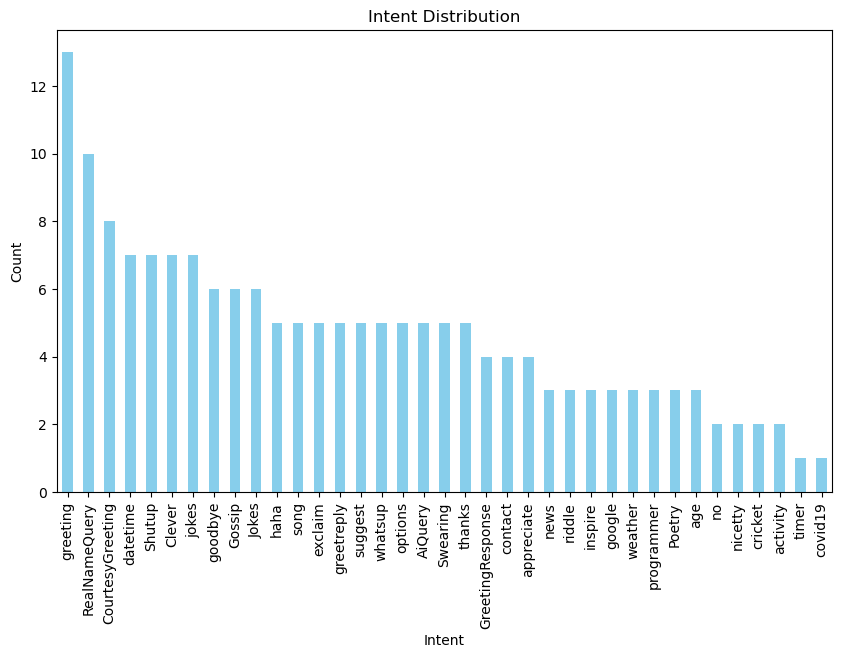

In [14]:
# Visualizing the distribution of intents
plt.figure(figsize=(10, 6))
df['Intent'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Intent Distribution')
plt.xlabel('Intent')
plt.ylabel('Count')
plt.show()

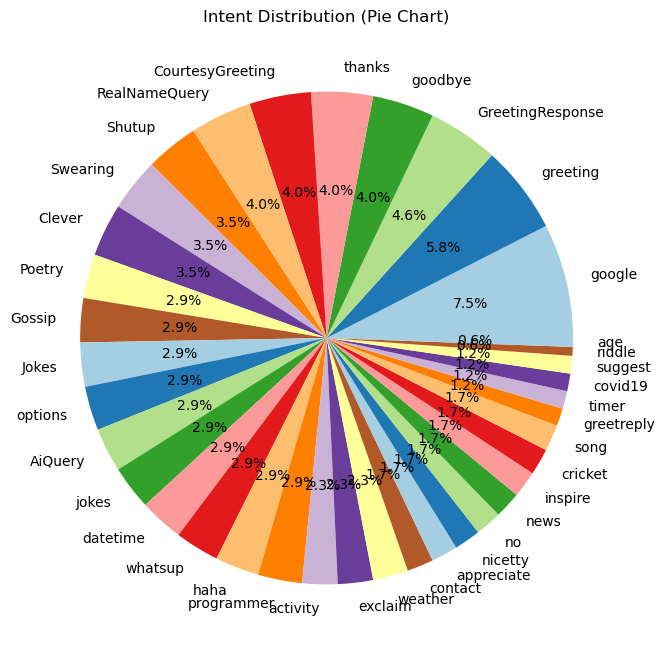

In [15]:
# Plot intent distribution as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(df['Intent'].value_counts(), labels=df['Intent'].unique(), autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Intent Distribution (Pie Chart)')
plt.show()

In [20]:
for intent in intents['intents']:
    for pattern in intent['patterns']:
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        documents.append((w, intent['tag']))

        if intent['tag'] not in classes:
            classes.append(intent['tag'])

In [22]:
words = [lemmatizer.lemmatize(word.lower()) for word in words if word not in ignore]
words = sorted(list(set(words)))
classes = sorted(list(set(classes)))


In [23]:
#Saving Vocabulary (words) and Classes (classes):

pickle.dump(words, open('words.pkl', 'wb'))
pickle.dump(classes, open('classes.pkl', 'wb'))

In [28]:
# Training data
training = []
output_empty = [0] * len(classes)

for doc in documents:
    bag = []
    pattern = doc[0]
    pattern = [lemmatizer.lemmatize(word.lower()) for word in pattern]

    for word in words:
        bag.append(1) if word in pattern else bag.append(0)

    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1

    training.append({'input': bag, 'output': output_row})

random.shuffle(training)
X_train = np.array([entry['input'] for entry in training])
y_train = np.array([entry['output'] for entry in training])

In [29]:
# Model
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(len(X_train[0]),)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(y_train[0]), activation='softmax'))

adam = keras.optimizers.Adam(0.001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
weights = model.fit(np.array(X_train), np.array(y_train), epochs=300, batch_size=16, verbose=1)


Epoch 1/300


11/11 [==============================] - 1s 4ms/step - loss: 3.6107 - accuracy: 0.0347 
Epoch 2/300
11/11 [==============================] - 0s 6ms/step - loss: 3.5412 - accuracy: 0.1040
Epoch 3/300
11/11 [==============================] - 0s 5ms/step - loss: 3.5098 - accuracy: 0.1098
Epoch 4/300
11/11 [==============================] - 0s 5ms/step - loss: 3.4445 - accuracy: 0.1098
Epoch 5/300
11/11 [==============================] - 0s 5ms/step - loss: 3.3206 - accuracy: 0.1503
Epoch 6/300
11/11 [==============================] - 0s 5ms/step - loss: 3.2659 - accuracy: 0.1734
Epoch 7/300
11/11 [==============================] - 0s 5ms/step - loss: 3.1447 - accuracy: 0.1792
Epoch 8/300
11/11 [==============================] - 0s 6ms/step - loss: 3.0247 - accuracy: 0.2254
Epoch 9/300
11/11 [==============================] - 0s 6ms/step - loss: 2.8260 - accuracy: 0.2832
Epoch 10/300
11/11 [==============================] - 0s 6ms/step - loss: 2.6383 - accuracy: 0.3699
Epoch

11/11 [==============================] - 0s 5ms/step - loss: 0.1364 - accuracy: 0.9711
Epoch 77/300
11/11 [==============================] - 0s 5ms/step - loss: 0.1388 - accuracy: 0.9595
Epoch 78/300
11/11 [==============================] - 0s 5ms/step - loss: 0.1498 - accuracy: 0.9422
Epoch 79/300
11/11 [==============================] - 0s 5ms/step - loss: 0.1078 - accuracy: 0.9711
Epoch 80/300
11/11 [==============================] - 0s 5ms/step - loss: 0.1707 - accuracy: 0.9364
Epoch 81/300
11/11 [==============================] - 0s 5ms/step - loss: 0.0916 - accuracy: 0.9653
Epoch 82/300
11/11 [==============================] - 0s 5ms/step - loss: 0.1426 - accuracy: 0.9538
Epoch 83/300
11/11 [==============================] - 0s 4ms/step - loss: 0.1307 - accuracy: 0.9653
Epoch 84/300
11/11 [==============================] - 0s 3ms/step - loss: 0.1186 - accuracy: 0.9711
Epoch 85/300
11/11 [==============================] - 0s 3ms/step - loss: 0.0915 - accuracy: 0.9711
Epoch 86/300


11/11 [==============================] - 0s 5ms/step - loss: 0.0597 - accuracy: 0.9884
Epoch 158/300
11/11 [==============================] - 0s 5ms/step - loss: 0.0876 - accuracy: 0.9653
Epoch 159/300
11/11 [==============================] - 0s 5ms/step - loss: 0.1068 - accuracy: 0.9595
Epoch 160/300
11/11 [==============================] - 0s 5ms/step - loss: 0.0930 - accuracy: 0.9595
Epoch 161/300
11/11 [==============================] - 0s 5ms/step - loss: 0.0749 - accuracy: 0.9769
Epoch 162/300
11/11 [==============================] - 0s 5ms/step - loss: 0.0599 - accuracy: 0.9769
Epoch 163/300
11/11 [==============================] - 0s 5ms/step - loss: 0.1091 - accuracy: 0.9480
Epoch 164/300
11/11 [==============================] - 0s 5ms/step - loss: 0.0613 - accuracy: 0.9769
Epoch 165/300
11/11 [==============================] - 0s 4ms/step - loss: 0.0822 - accuracy: 0.9653
Epoch 166/300
11/11 [==============================] - 0s 4ms/step - loss: 0.0494 - accuracy: 0.9827
Epoc

11/11 [==============================] - 0s 5ms/step - loss: 0.0577 - accuracy: 0.9769
Epoch 239/300
11/11 [==============================] - 0s 5ms/step - loss: 0.0729 - accuracy: 0.9595
Epoch 240/300
11/11 [==============================] - 0s 5ms/step - loss: 0.0487 - accuracy: 0.9769
Epoch 241/300
11/11 [==============================] - 0s 5ms/step - loss: 0.0700 - accuracy: 0.9711
Epoch 242/300
11/11 [==============================] - 0s 5ms/step - loss: 0.0601 - accuracy: 0.9769
Epoch 243/300
11/11 [==============================] - 0s 4ms/step - loss: 0.0680 - accuracy: 0.9653
Epoch 244/300
11/11 [==============================] - 0s 4ms/step - loss: 0.0604 - accuracy: 0.9653
Epoch 245/300
11/11 [==============================] - 0s 5ms/step - loss: 0.0328 - accuracy: 0.9884
Epoch 246/300
11/11 [==============================] - 0s 5ms/step - loss: 0.0803 - accuracy: 0.9653
Epoch 247/300
11/11 [==============================] - 0s 5ms/step - loss: 0.0456 - accuracy: 0.9884
Epoc

In [30]:
model.save('mymodel.h5', weights)

C:\Users\Kaleem\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [39]:
#testing the chatbot

from keras.models import load_model

# Load the pre-trained model and other required files
model = load_model('mymodel.h5')
words = pickle.load(open('words.pkl', 'rb'))
classes = pickle.load(open('classes.pkl', 'rb'))

# Load intents file
with open('intonts.json') as file:
    intents = json.load(file)

# making a function to clean up user input
def clean_up(sentence):
    sentence_words = nltk.word_tokenize(sentence)
    sentence_words = [WordNetLemmatizer().lemmatize(word.lower()) for word in sentence_words]
    return sentence_words

# making a function to create bag of words
def create_bow(sentence, words):
    sentence_words = clean_up(sentence)
    bag = [0]*len(words)
    for s in sentence_words:
        for i, w in enumerate(words):
            if w == s:
                bag[i] = 1
    return(np.array(bag))

# making a function to predict class based on user input
def predict_class(sentence, model, words, classes):
    p = create_bow(sentence, words)
    res = model.predict(np.array([p]))[0]
    ERROR_THRESHOLD = 0.25
    results = [[i, r] for i, r in enumerate(res) if r > ERROR_THRESHOLD]
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append({'intent': classes[r[0]], 'probability': str(r[1])})
    return return_list

# making a function to get a response based on predicted intent
def get_response(intent, intents):
    for i in intents['intents']:
        if i['tag'] == intent:
            return np.random.choice(i['responses'])

# asking queries
queries = ["hello", "how are yoy doing?", "what are you doing?", "what is yoa real name?", "write some of poetry",  "tell me a joke", "you are useless", "tell me a gossip", "can you tell me something about AI", "you are very intelligent", "ask me a riddle"]

for query in queries:
    # Get the predicted intent
    intent_list = predict_class(query, model, words, classes)
    intent = intent_list[0]['intent']

    # Get and print the chatbot's response
    response = get_response(intent, intents)
    print(f"User: {query}")
    print(f"Chatbot: {response}")
    print("="*50)


1/1 [==============================] - 0s 63ms/step
User: hello
Chatbot: Greetings! Is there anything specific you'd like to know?
1/1 [==============================] - 0s 35ms/step
User: how are yoy doing?
Chatbot: I'm doing well, thank you. How are you doing?
1/1 [==============================] - 0s 18ms/step
User: what are you doing?
Chatbot: Talking to you, of course!
1/1 [==============================] - 0s 20ms/step
User: what is yoa real name?
Chatbot: My real name is Multifunctional AI Response Companion, but you can call me M.A.R.C
1/1 [==============================] - 0s 19ms/step
User: write some of poetry
Chatbot: Whispers of the wind through leaves that sigh, In the quiet of the night, under the starry sky
1/1 [==============================] - 0s 18ms/step
User: tell me a joke
Chatbot: Parallel lines have it easy. They're always in the same direction.
1/1 [==============================] - 0s 17ms/step
User: you are useless
Chatbot: Please mail your suggestions to muh